**STOCK PRICE PREDICTION - MINI PROJECT**

# Stock Price Prediction Project
## Step 1: Data Collection
This notebook collects historical stock price data for Apple (AAPL) using the `yfinance` library.

In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf

In [ ]:
# Download Apple stock data from 2018 to 2023
data = yf.download('AAPL', start='2018-01-01', end='2023-01-01')

[*********************100%***********************]  1 of 1 completed


In [ ]:
print(data.head())

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2018-01-02  40.479847  40.489249  39.774869  39.986364  102223600
2018-01-03  40.472782  41.017967  40.409337  40.543281  118071600
2018-01-04  40.660782  40.764179  40.437540  40.545634   89738400
2018-01-05  41.123722  41.210668  40.665487  40.757134   94640000
2018-01-08  40.970974  41.267063  40.872274  40.970974   82271200


In [ ]:
# Save the data to a CSV file
data.to_csv('AAPL_stock_data.csv')

## Step 2: Preprocess the Data
Preprocessing involves cleaning, transforming, and organizing the data so that it can be used effectively in model.


In [ ]:
import pandas as pd


In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
print(data.head())

   1       Date      Close       High        Low       Open     Volume  MA_7  \
0  2 2018-01-02  40.479847  40.489249  39.774869  39.986364  102223600   NaN   
1  3 2018-01-03  40.472782  41.017967  40.409337  40.543281  118071600   NaN   
2  4 2018-01-04  40.660782  40.764179  40.437540  40.545634   89738400   NaN   
3  5 2018-01-05  41.123722  41.210668  40.665487  40.757134   94640000   NaN   
4  6 2018-01-08  40.970974  41.267063  40.872274  40.970974   82271200   NaN   

      Target  
0  40.472782  
1  40.660782  
2  41.123722  
3  40.970974  
4  40.966278  


In [ ]:
data.to_csv('AAPL_stock_data.csv')

In [ ]:
from google.colab import files
files.download('AAPL_stock_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data.to_csv('/content/drive/My Drive/AAPL_stock_data.csv')

In [ ]:
# Load the .xlsx file
data = pd.read_excel('AAPL_stock_data.xlsx')

# Display the first few rows of the data
print(data.head())


   1       Date      Close       High        Low       Open     Volume
0  2 2018-01-02  40.479847  40.489249  39.774869  39.986364  102223600
1  3 2018-01-03  40.472782  41.017967  40.409337  40.543281  118071600
2  4 2018-01-04  40.660782  40.764179  40.437540  40.545634   89738400
3  5 2018-01-05  41.123722  41.210668  40.665487  40.757134   94640000
4  6 2018-01-08  40.970974  41.267063  40.872274  40.970974   82271200


In [ ]:
data.to_csv('AAPL_stock_data_fixed.csv')


In [ ]:
print(data.isnull().sum())  # Check for missing values
data = data.dropna()  # Drop rows with missing values


1         0
Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64


In [ ]:
# Example: Create a 7-day moving average
data['MA_7'] = data['Close'].rolling(window=7).mean()

In [ ]:
data['Target'] = data['Close'].shift(-1)  # Next day's closing price

In [ ]:
print(data.columns)

Index([1, 'Date', 'Close', 'High', 'Low', 'Open', 'Volume', 'MA_7', 'Target'], dtype='object')


In [ ]:
# Convert column names to strings
data.columns = data.columns.astype(str)

# Check the column names again
print(data.columns)

Index(['1', 'Date', 'Close', 'High', 'Low', 'Open', 'Volume', 'MA_7',
       'Target'],
      dtype='object')


In [ ]:
# Create the target variable (e.g., next day's closing price)
data['Target'] = data['Close'].shift(-1)

# Drop the last row (since it won't have a target value)
data = data.dropna()

In [38]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Convert DateTime column to string or drop it
if 'Date' in data.columns:
    data = data.drop(columns=['Date'])  # Drop Date column
    # OR
    # data['Date'] = data['Date'].astype(str)  # Convert Date column to string if needed

# Initialize the scaler
scaler = MinMaxScaler()

# Select only numeric columns (excluding target variable)
numeric_columns = data.select_dtypes(include=['number']).columns
numeric_columns = numeric_columns.drop('Target')  # Exclude target column

# Scale the features
scaled_features = scaler.fit_transform(data[numeric_columns])

# Convert back to DataFrame
scaled_data = pd.DataFrame(scaled_features, columns=numeric_columns, index=data.index)

# Add the target variable back
scaled_data['Target'] = data['Target'].values

# Display the first few rows
print(scaled_data.head())


   Unnamed: 0         1     Close      High       Low      Open    Volume  \
0   -1.730676 -1.730676 -1.197356 -1.205769 -1.203111 -1.206905 -0.266380   
1   -1.727924 -1.727924 -1.197509 -1.194448 -1.189168 -1.194827  0.021646   
2   -1.725173 -1.725173 -1.193433 -1.199882 -1.188548 -1.194776 -0.493290   
3   -1.722421 -1.722421 -1.183396 -1.190322 -1.183538 -1.190190 -0.404207   
4   -1.719670 -1.719670 -1.186707 -1.189114 -1.178994 -1.185552 -0.629001   

   MA_7     Target  
0   NaN  40.472782  
1   NaN  40.660782  
2   NaN  41.123722  
3   NaN  40.970974  
4   NaN  40.966278  


In [ ]:
# Save the scaled data to a CSV file
scaled_data.to_csv("scaled_stock_data.csv", index=False)
print("Scaled data saved successfully.")


Scaled data saved successfully.


In [ ]:
from sklearn.model_selection import train_test_split

# Define input features (X) and target variable (y)
X = scaled_data.drop(columns=['Target'])  # All columns except target
y = scaled_data['Target']  # Target column

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Print shapes to verify
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


X_train shape: (1001, 7), y_train shape: (1001,)
X_test shape: (251, 7), y_test shape: (251,)


In [ ]:
# Save training set
X_train.to_csv("X_train.csv", index=False)
y_train.to_csv("y_train.csv", index=False)

# Save testing set
X_test.to_csv("X_test.csv", index=False)
y_test.to_csv("y_test.csv", index=False)

print("Train and test datasets saved successfully.")


Train and test datasets saved successfully.


In [1]:
# Install required libraries if not already installed
!pip install xgboost scikit-learn pandas matplotlib

In [15]:
# Import necessary libraries
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
# Load your dataset
file_path = "/content/miniproject (1).ipynb"  # Adjust if needed
data = pd.read_csv("AAPL_stock_data.csv")  # Use read_csv if the file is a CSV

In [19]:
print(data.head())
print(data.info())

   Unnamed: 0  1        Date      Close       High        Low       Open  \
0           0  2  2018-01-02  40.479847  40.489249  39.774869  39.986364   
1           1  3  2018-01-03  40.472782  41.017967  40.409337  40.543281   
2           2  4  2018-01-04  40.660782  40.764179  40.437540  40.545634   
3           3  5  2018-01-05  41.123722  41.210668  40.665487  40.757134   
4           4  6  2018-01-08  40.970974  41.267063  40.872274  40.970974   

      Volume  MA_7     Target  
0  102223600   NaN  40.472782  
1  118071600   NaN  40.660782  
2   89738400   NaN  41.123722  
3   94640000   NaN  40.970974  
4   82271200   NaN  40.966278  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1259 non-null   int64  
 1   1           1259 non-null   int64  
 2   Date        1259 non-null   object 
 3   Close       1259 non-null   float6

In [23]:
# Define Features (Exclude target variables) and Target (Multiple target variables)
X = data.drop(columns=['Open', 'Close', 'High', 'Low', 'Volume'])
y = data[['Open', 'Close', 'High', 'Low', 'Volume']]

In [24]:
# Split Data into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
X_train['Date'] = pd.to_datetime(X_train['Date']).astype(int) // 10**9  # Convert to Unix timestamp
X_test['Date'] = pd.to_datetime(X_test['Date']).astype(int) // 10**9

In [27]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [31]:
# Set XGBoost Parameters
params = {
    'objective': 'reg:squarederror',  # Use 'binary:logistic' for classification
    'eval_metric': 'rmse',
    'learning_rate': 0.1,
    'max_depth': 6,
}

In [32]:
# Train XGBoost Model
model = xgb.train(params, dtrain, num_boost_round=100)

In [33]:
# Make Predictions
y_pred = model.predict(dtest)

In [37]:
# Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R² Score: {r2}')

MSE: 228221140336640.0
RMSE: 15106989.784091337
R² Score: -150.22706604003906


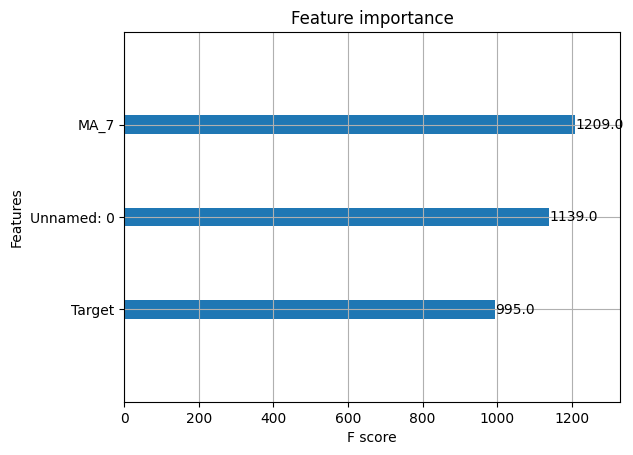

In [35]:
# Plot Feature Importance
xgb.plot_importance(model)
plt.show()